Malik and Pitt resampling:

We are assuming that we have a set of uniforms that we use
to invert the cdf $\tilde{F}(x)$ above. So, we have the set of N, sorted in ascending order, uniform variates u1 < · · · < uN . The generation of the, possibly stratified, uniforms is discussed later in this appendix.


The pseudo-algorithm given below samples the index corre- sponding to the region which are stored as r1, r2, . . . , rN , and also produces a new set of uniforms, u∗1, . . . , u∗N 

set s = 0, j = 1; for {i = 0 : N}
{
    s = s + πi;
    while(uj ≤s & j≤N){
        rj =i;
        u∗j = (uj − (s − πi))/πi 
        j=j+1
}

For the selected regions where $r^j = 0$, we set $x_j^* = x^{(1)}$ and when $r^j = N$ we set $x_j^* = x^{(N)}$. Otherwise set: 
(x(rj+1) − x(rj)) × u∗j + x(rj
$x_j^* = (x^{(r^j+1)} - x^{(r^j)}) * u_j^* + x^{(r^j)}$

### Goal:

Sample $x_1,...,x_n$ from $f(x)$ with weights $\pi_j, j=1,...,n$

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [10]:
np.random.seed(0)

N = 10
rv = norm()
x = rv.rvs(size=N)
print(x)

w = rv.pdf(x)
print(w)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[0.08417319 0.36824698 0.24711473 0.03239537 0.0697509  0.24746786
 0.25403772 0.39439867 0.39682274 0.3666916 ]


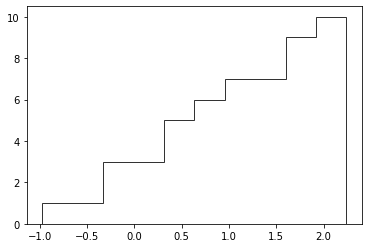

In [31]:
plt.hist(x, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k');

In [11]:
# sorted uniform variates: 
np.random.seed(0)

# normalized weights
pi = w/sum(w)
print("Normalized weights, pi: ", pi)

U = np.random.uniform()
j = np.arange(N)

u = j/N + U/N
print("U: ", u)

Normalized weights, pi:  [0.03420145 0.149627   0.10040825 0.01316297 0.02834135 0.10055174
 0.10322122 0.16025302 0.16123797 0.14899502]
U:  [0.05488135 0.15488135 0.25488135 0.35488135 0.45488135 0.55488135
 0.65488135 0.75488135 0.85488135 0.95488135]


In [45]:
s = 0
j = 0
r = np.zeros(N)
u_new = np.zeros(N)

for i in range(N):
    s = s + pi[i]
    while (j < N) and (u[j] < s):
        r[j] = i
        u_new[j] = (u[j] - (s - pi[i]))/pi[i]
        j += 1
        
r

array([1., 1., 2., 5., 6., 7., 7., 8., 9., 9.])

In [46]:
x_new = np.zeros(N)

# x_new[r == 0] = r[r == 0]
# x_new[r == N] = r[r == N]

for j in range(N-1):
    rj = int(r[j])
    if rj + 1 <= N:
        # sample last region
        pass
    else:
        x_new[j] = (x[rj + 1] - x[rj])*u_new[j] + x[rj]

x_new

1
0.4001572083672233
1
0.4001572083672233
2
0.9787379841057392
5
-0.977277879876411
6
0.9500884175255894
7
-0.1513572082976979
7
-0.1513572082976979
8
-0.10321885179355784
9
0.41059850193837233


IndexError: index 10 is out of bounds for axis 0 with size 10

In [47]:
def continuous_stratified_resample(weights, xs):
    n = len(weights)
    # generate n uniform rvs with stratified method
    u0 = np.random.uniform(size=1)
    u = [(u0 + i) / n for i in range(n)]
    pi = np.zeros(n + 1)
    pi[0] = weights[0] / 2
    pi[n] = weights[-1] / 2
    for i in range(1, n):
        pi[i] = (weights[i] + weights[i - 1]) / 2
    # algo described in the paper A.3.
    # pi = np.append(0, weights)
    r = np.zeros(n)
    u_new = np.zeros(n)
    s = 0
    j = 1

    for i in range(n + 1):
        s = s + pi[i]
        while(j <= n and u[j - 1] <= s):
            r[j - 1] = i
            u_new[j - 1] = (u[j - 1] - (s - pi[i])) / pi[i]
            j = j + 1

    r = r.astype(int)

    x_new = np.zeros(n)
    for k in range(n):
        if r[k] == 0:
            x_new[k] = xs[0]
        elif r[k] == n:
            x_new[k] = xs[-1]
        else:
            x_new[k] = (xs[r[k]] - xs[r[k] - 1]) * u_new[k] + xs[r[k] - 1]
    return x_new

In [49]:
x_new = continuous_stratified_resample(pi, x)

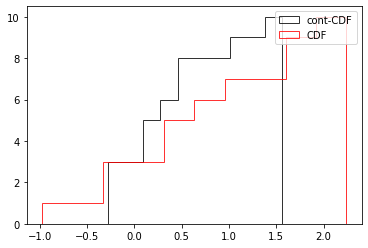

In [55]:
plt.hist(x_new, cumulative=True, label='cont-CDF',
         histtype='step', alpha=0.8, color='k')
plt.hist(x, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='r')
plt.legend();